### Summative Assignment
#### Understanding AI (771763_A23_T1)
##### Summative Assignment: Portfolio of Work
##### Sulaiman Adeleye Shina
##### Student Number: 202236581

### Exercise 2: 
### Image Recognition to Identify Species of Flowers (30%)

We will be developing a Convolutional Neural Network (CNN) model that identify
the species of flowers from photographs. I will train this model using the tf_flowers dataset
from Tensor Flow:
        https://www.tensorflow.org/datasets/catalog/tf_flowers
The dataset contains 3670 colour photographs of flowers, consisting of five different
species:
        • Daisy.
        • Dandelion.
        • Roses.
        • Sunflowers.
        • Tulips.

##### Let's Start by Importing the Require Libraries the Loading In Our DataSets

In [1]:
# Importing all necesarry Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import warnings
warnings.filterwarnings("ignore")

from tensorflow.python import keras
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import the ImageDataGenerator class from tensorflow.
from tensorflow.keras.models import Sequential # Import the Sequential model from Tensor Flow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout # Import the required model layers from Tensor Flow

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
# Loading Images from Directory
data_dir = r'./flower_photos'
data_dir = pathlib.Path(data_dir).with_suffix('')

### Data Exploratory Analysis and Visualization

In [3]:
# Setting Our Variables
batchSize = None
# Image actual size is 256 but we are reducing the size to 180 by 180 
# This reduction will help us reduce the time it Takes for Training
imagegHeight = 256 # Change to 256 later 
imageWidth = 256 # Change to 256 later 

In [4]:
# Total Number of Images to Be Use
imageCount = len(list(data_dir.glob('*/*.jpg')))
print('The total number of Images in our dataset is ', imageCount)

The total number of Images in our dataset is  3670


In [5]:
# Defining the training datasets
# For train dataset Validation split will be 0.2, 
# we are using 80% of our images for training and 20% for validation

trainDataSet = image_dataset_from_directory(data_dir,
                                            validation_split = 0.2, 
                                            subset = "training",
                                            seed = 42, 
                                            image_size = (imagegHeight, imageWidth), 
                                            batch_size = batchSize)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
# Define the testing datasets
# For Test dataset Validation split will be 0.2, 
# we are using 80% of our images for training and 20% for validation

testDataSet = image_dataset_from_directory(data_dir,
                                           validation_split = 0.2,
                                           subset = "validation",
                                           seed = 42, 
                                           image_size = (imagegHeight, imageWidth), 
                                           batch_size = batchSize)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
x_train = []
y_train = []
for x, y in trainDataSet:
    x_train.append(np.uint8(x.numpy()))
    y_train.append(y.numpy())

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_test = []
y_test = []
for x, y in testDataSet:
    x_test.append(np.uint8(x.numpy()))
    y_test.append(y.numpy())

In [10]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [11]:
# Printing flower class names in training data
classNames = trainDataSet.class_names
print(classNames)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [12]:
# Printing flower class names in testing data
print(testDataSet.class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [13]:
for image_batch, labels_batch in trainDataSet:
    print(image_batch.shape) # Prints the shape of the image
    print(labels_batch.shape) # Prints the shape of the batch
    break

(256, 256, 3)
()


##### From the output above we have a tuple containing the size of the array in each dimension. The first number gives how many images are contained in the array. The second and third number gives the width and height of each image in pixels. 
##### The x_train and x_test arrays contain 4 dimensions because it is a colour images and  the final dimension has a size of 3 corresponding to the Red, Green and Blue channels.


### DATA VISUALIZATION

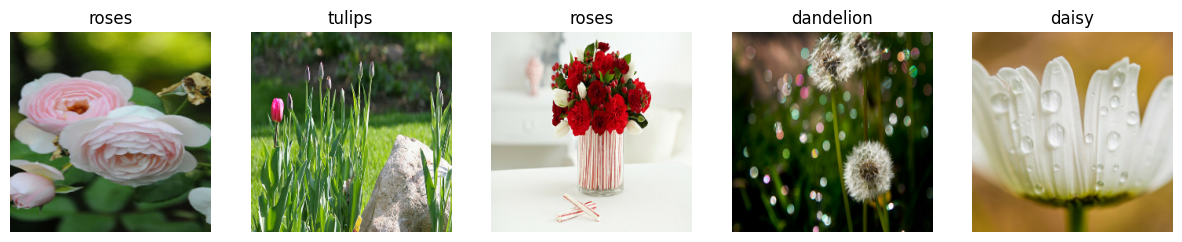

In [14]:
# Using Matplotlib we will plot 5 images in the Training Dataset
fig, axs = plt.subplots(1, 5, figsize = (15, 3)) # List the image in 1 Row and 5 columns
# create a for loop that produces five (5) images of training dataset using imshow function in matplotlib to plot the image 
for i in range(5):
    axs[i].imshow(x_train[i])
    
# the class label for the image is printed 
    axs[i].set_title(classNames[y_train[i]])
    axs[i].axis("off")  # off/disable the axis tick label
plt.show()   

### Data Pre-Processing

##### Training the dataset so that it is in a suitable format that can be used in the CNN model. 
##### I will train the CNN model using the output class labels which will be encoded with One Hot Encoding rather than Label Encoding, so that the output arrays have the same dimensions and size as the output layer of the CNN.

In [15]:

# import the to_cartegorical function 
# *Already Imported the Library for one hot encoding at the begining of the notebook
# Converting the y_train and y_test to one hot encoded values 
 
y_train_cat = to_categorical(y_train, 5)    # convert y_train to one hot encoded value
y_test_cat = to_categorical(y_test)      # Converts the y_test to one hot encoding

In [16]:
# We can print the first five (5) samples of targets of the training set
print(f'Original labels : {y_train[:5]}')
print(f'One hot encoded labels : {y_train_cat[:5]}') 

Original labels : [2 4 2 1 0]
One hot encoded labels : [[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


**One Hot Encoding creates an array that is equal to the number of classes with the class under consideration receiving a One(1) and the rest recieving zero(0)**

In [17]:
# Normalis the images by dividing by 255,so all pixel values lie in the range 0 - 1
x_trainNormalized = x_train / 255
x_testNormalized = x_test / 255


### Data Normalization

In [18]:
# Record the width and height of each image, in pixels.
width_npix = x_trainNormalized.shape[1]
height_npix = x_trainNormalized.shape[2]

In [19]:
x_trainNormalized.min()

0.0

In [20]:
x_trainNormalized.max()

1.0

In [21]:
# Print the shape of each array.
print("x_train shape is:", x_train.shape)
print("x_test shape is:", x_test.shape)
print("y_train shape is:", y_train.shape)
print("y_test shape is:", y_test.shape)

x_train shape is: (2936, 256, 256, 3)
x_test shape is: (734, 256, 256, 3)
y_train shape is: (2936,)
y_test shape is: (734,)


In [22]:
# Checking for minimum and maximum by flattening your image
print(f'Minimum pixel: {min(x_train[0].flatten())}') # Prints the minimum pixel
print(f'Maximum pixel: {max(x_train[0].flatten())}') # Prints the maximum pixel

print(f'DataType: {x_train.dtype}') # The datatype is unsigned integer hence the need to convert to 

Minimum pixel: 0
Maximum pixel: 237
DataType: uint8


In [23]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(
                                    rotation_range = 20, # Randomly rotate images up to 10 degrees
                                    width_shift_range = 0.1, # Randomly shift images horizontally up to 10% of the width
                                    height_shift_range = 0.1, # Randomly shift images vertically up to 10% of the height
                                    horizontal_flip = True, # Randomly flip images horizontally
                                    vertical_flip = False, # Don't randomly flip images vertically
                                    shear_range = 0.10, # crops part of the image
                                    zoom_range = 0.10, # #zooms the image by 10%
                                    validation_split =0.2 # Set the validation split
                                    )

In [24]:
# Fit the transformation to the training dataset
train_datagen.fit(x_trainNormalized)

Text(0.5, 0, 'augmented image')

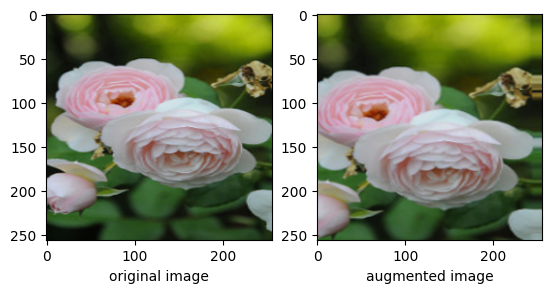

In [25]:
new_image = train_datagen.random_transform(x_train[0])  # augmented image

#plotting an original and augmented image.
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].imshow(x_train[0])
ax[1].imshow(new_image)
ax[0].set_xlabel('original image')
ax[1].set_xlabel("augmented image")

### Building The First Model

##### Constructor Stage

In [26]:
# Create an instance of the Sequential class.
model = Sequential()

# Add the Convolutional layers.
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 input_shape = (width_npix, height_npix, 3),
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), 
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# flatten Layers
model.add(Flatten())

#Dense layers with dropout
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation = 'softmax'))  # softmax used for multi class classifcation activation

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

##### Compilation Stage

In [27]:
# Compiling the model
# We specify the optimizer as rmsprop, loss as categorical_crossentropy, metrics as accuracy
# We specify 0.001 as Learning Rate which is Also the default

# adam_optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics='accuracy')

##### Training Stage

In [28]:
# Training the model
batchSize = 32
history = model.fit(train_datagen.flow(x_trainNormalized,
                                       y_train_cat, 
                                       batch_size =batchSize,
                                       subset = "training"), epochs = 20,
validation_data = train_datagen.flow(x_trainNormalized,
                                     y_train_cat, 
                                     batch_size = batchSize, subset = "validation"))

Epoch 1/20
74/74 [==============================] - 43s 569ms/step - loss: 1.5265 - accuracy: 0.3372 - val_loss: 1.2317 - val_accuracy: 0.4651
Epoch 2/20
74/74 [==============================] - 45s 604ms/step - loss: 1.2018 - accuracy: 0.4845 - val_loss: 1.0919 - val_accuracy: 0.5673
Epoch 3/20
74/74 [==============================] - 46s 626ms/step - loss: 1.1283 - accuracy: 0.5304 - val_loss: 1.0333 - val_accuracy: 0.5877
Epoch 4/20
74/74 [==============================] - 47s 637ms/step - loss: 1.0655 - accuracy: 0.5768 - val_loss: 0.9676 - val_accuracy: 0.6303
Epoch 5/20
74/74 [==============================] - 48s 654ms/step - loss: 1.0056 - accuracy: 0.6100 - val_loss: 0.9636 - val_accuracy: 0.6354
Epoch 6/20
74/74 [==============================] - 48s 651ms/step - loss: 0.9338 - accuracy: 0.6437 - val_loss: 0.8572 - val_accuracy: 0.6661
Epoch 7/20
74/74 [==============================] - 50s 674ms/step - loss: 0.8935 - accuracy: 0.6501 - val_loss: 0.8634 - val_accuracy: 0.6593

In [29]:
# Creating a pandas dataframe to hold the history of the fitting
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.526502,0.337165,1.231721,0.465077
1,1.201805,0.484461,1.091881,0.567291
2,1.128279,0.530438,1.033292,0.587734
3,1.065493,0.576841,0.967635,0.630324
4,1.005615,0.610047,0.963557,0.635434
5,0.933756,0.643678,0.857189,0.666099
6,0.893547,0.650064,0.863366,0.659284
7,0.862245,0.673904,0.850934,0.671210
8,0.805612,0.696041,0.838687,0.678024
9,0.774722,0.702427,0.779673,0.710392


Text(0, 0.5, 'Accuracy')

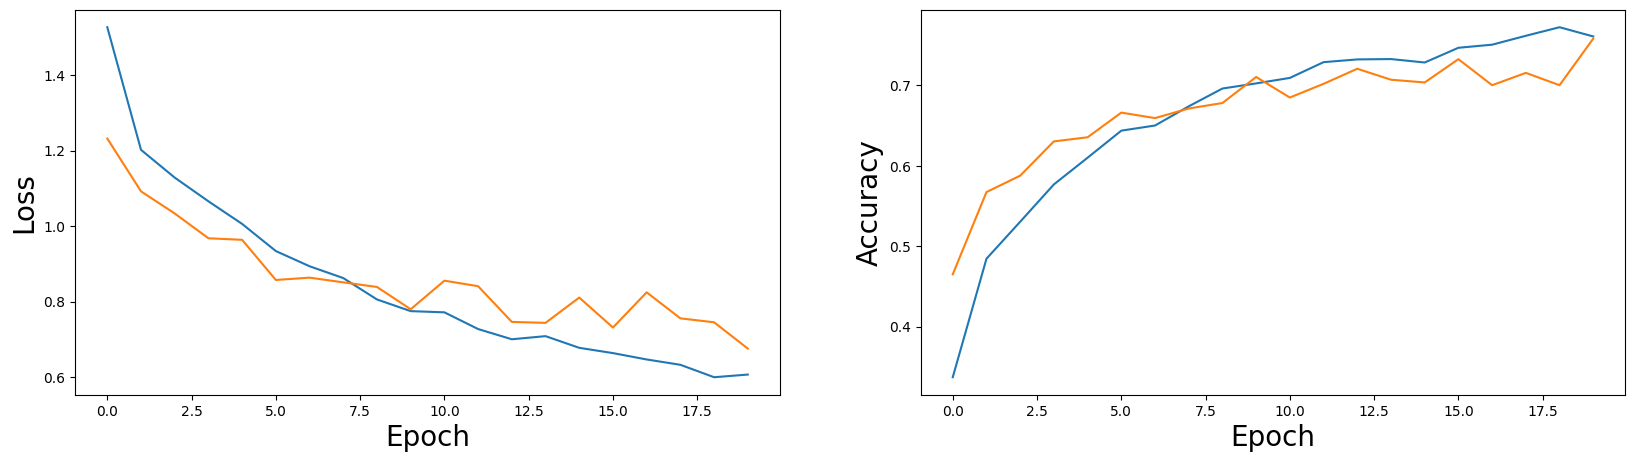

In [30]:
training_loss = history_df['loss'] # Extracting the training loss
val_loss =  history_df['val_loss'] # Extracting the validation loss
training_accuracy = history_df['accuracy']  # Extracting the training accuracy
val_accuracy = history_df['val_accuracy']  # Extracting the val accuracy

# Plot of the loss
fig, ax = plt.subplots(1, 2, figsize = (20, 5)) # Create 2 axes (0 and 1)
ax[0].plot(training_loss)
ax[0].plot(val_loss)
ax[0].set_xlabel('Epoch', fontsize = 20)
ax[0].set_ylabel('Loss', fontsize = 20)

# Plot of the accuracy
ax[1].plot(training_accuracy)
ax[1].plot(val_accuracy)
ax[1].set_xlabel('Epoch', fontsize = 20)
ax[1].set_ylabel('Accuracy', fontsize = 20)

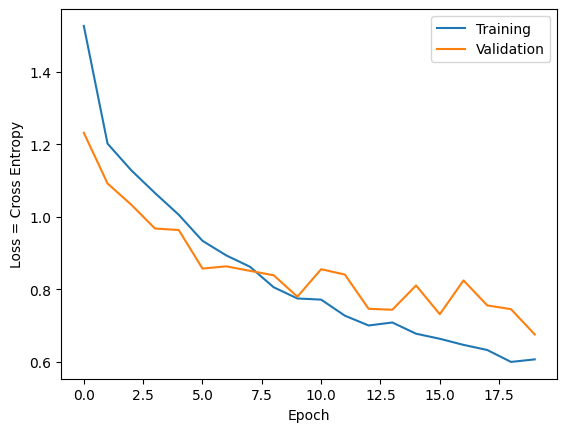

In [31]:

# Plot the training and validation losses
# versus epoch.
# plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

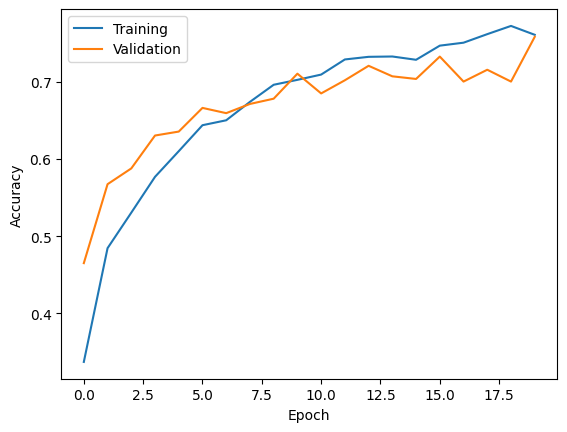

In [32]:
# Plot the training and validation accuracy versus epoch.
# plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

##### Evaluation Stage

In [33]:
# Using the trained model to predict output  classes in the test set
y_pred = model.predict(x_testNormalized)

# We can now use  the argmax() function to determine the index # of the label with the highest probability for   each row in y_pred.
y_pred_class = np.argmax(y_pred, axis=1)

23/23 [==============================] - 3s 113ms/step


In [34]:
# Evaluate the model for the overall accuracy of the model
model.evaluate(x=x_testNormalized, y = y_test_cat)   

23/23 [==============================] - 3s 112ms/step - loss: 0.7325 - accuracy: 0.7398


[0.7324591875076294, 0.7397820353507996]

In [35]:
# evaluation on the test set
y_pred = model.predict(x_test)

print(y_pred[:5])
y_pred = y_pred.argmax(axis = 1)

23/23 [==============================] - 3s 113ms/step
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


##### Visualization Stage(Result Visualization)

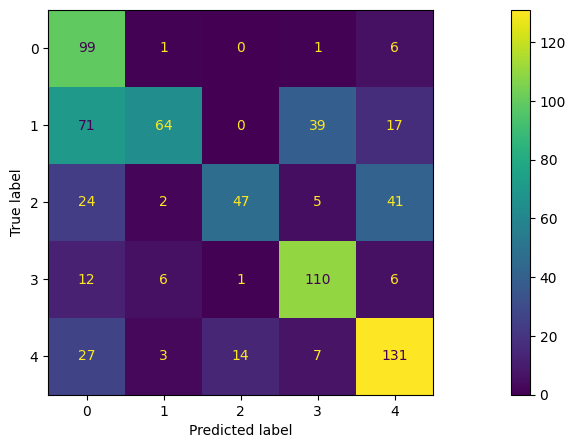

In [36]:
# Displaying the Confusion Matrix
y_test = y_test_cat.argmax(axis=1)

fig, ax = plt.subplots(figsize = (20, 5))

cm = confusion_matrix(y_test,y_pred)
disp =ConfusionMatrixDisplay(cm)
disp.plot(ax=ax)

plt.show()

In [37]:
# Displaying the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.79      0.71       107
           1       0.78      0.76      0.77       191
           2       0.71      0.65      0.68       119
           3       0.74      0.88      0.80       135
           4       0.79      0.64      0.71       182

    accuracy                           0.74       734
   macro avg       0.73      0.74      0.73       734
weighted avg       0.74      0.74      0.74       734



### HYPERPARAMETER TUNING

### Building The Second Model

##### Constructor Stage

In [38]:
# We will be building the CNN model. Using the _Sequential()_ model from 
# the Keras library to build a CNN with our preffered architecture.
# The libraries has been imported at the begining


model = Sequential() # Instantiating the model

# First layer of 32 filters and Maxpooling layer with input_shape
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                input_shape = (width_npix, height_npix, 3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # MaxPooling The Layer

# Second layer of 64 filters and Maxpooling layer with input_shape
model.add(Conv2D(filters = 64, kernel_size = (3, 3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # MaxPooling Layer

# Third layer of 128 filters and Maxpooling layer with input_shape
model.add(Conv2D(filters = 128, kernel_size = (3, 3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # MaxPooling Layer

# Flatten The Layer
model.add(Flatten()) # Converting 2d to 1d

# Dense layer of 64 Units and dropout layer
model.add(Dense(64,
                activation = 'relu'))
model.add(Dropout(0.5)) # Dropout of 50% of neuron at each training

# Output Layer with 5 classes
model.add(Dense(5,
                activation = 'softmax'))

model.summary() # Print model summary



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

##### Compilation Stage

In [39]:
# We will be compiling the data here.
# We will be using Adam optimizer with learning rate of 0.01 which is higher than the default 0.001 use in the first model above
# All modules imported already

adamOptimizer = Adam(learning_rate = 0.01)
model.compile(optimizer = adamOptimizer, 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

##### Training Stage

In [40]:
# We will be training in this stage
# We are training this model for 20 epochs, using batches of randomly
# --transformed images generated from the training data, with a batch size of 32
# Specifies a batch size for the training and uses the train_datagen from augmentation during training
# batch_size = 32
history = model.fit(train_datagen.flow(x_trainNormalized, y_train_cat,
                                       batch_size = batchSize,
                                       subset = "training"),
                    epochs = 20,
                    validation_data = train_datagen.flow(x_trainNormalized, y_train_cat,
                                                         batch_size = batchSize,
                                                         subset = "validation"))

Epoch 1/20
74/74 [==============================] - 49s 655ms/step - loss: 9.1858 - accuracy: 0.2299 - val_loss: 1.6011 - val_accuracy: 0.2470
Epoch 2/20
74/74 [==============================] - 48s 652ms/step - loss: 1.6046 - accuracy: 0.2393 - val_loss: 1.6027 - val_accuracy: 0.2470
Epoch 3/20
74/74 [==============================] - 50s 680ms/step - loss: 1.6045 - accuracy: 0.2393 - val_loss: 1.6013 - val_accuracy: 0.2470
Epoch 4/20
74/74 [==============================] - 50s 669ms/step - loss: 1.6041 - accuracy: 0.2393 - val_loss: 1.6011 - val_accuracy: 0.2470
Epoch 5/20
74/74 [==============================] - 50s 671ms/step - loss: 1.6049 - accuracy: 0.2393 - val_loss: 1.6012 - val_accuracy: 0.2470
Epoch 6/20
74/74 [==============================] - 49s 654ms/step - loss: 1.6046 - accuracy: 0.2393 - val_loss: 1.6012 - val_accuracy: 0.2470
Epoch 7/20
74/74 [==============================] - 50s 680ms/step - loss: 1.6045 - accuracy: 0.2393 - val_loss: 1.6010 - val_accuracy: 0.2470

In [41]:
# Dataframe for holding the history of our fitting
history_df = pd.DataFrame(history.history) # Saving to a DataFrame
history_df # Printing the DataFrame

,loss,accuracy,val_loss,val_accuracy
0,9.185836,0.229885,1.601103,0.247019
1,1.604556,0.239251,1.602677,0.247019
2,1.604493,0.239251,1.601265,0.247019
3,1.604115,0.239251,1.601089,0.247019
4,1.604914,0.239251,1.601229,0.247019
5,1.604572,0.239251,1.601179,0.247019
6,1.604545,0.239251,1.600994,0.247019
7,1.604856,0.239251,1.601043,0.247019
8,1.604699,0.239251,1.601239,0.247019
9,1.604433,0.239251,1.601147,0.247019


In [42]:
training_loss = history_df['loss'] # Extracting the training loss
val_loss =  history_df['val_loss'] # Extracting the validation loss
training_accuracy = history_df['accuracy']  # Extracting the training accuracy
val_accuracy = history_df['val_accuracy']  # Extracting the val accuracy


Text(0, 0.5, 'Accuracy')

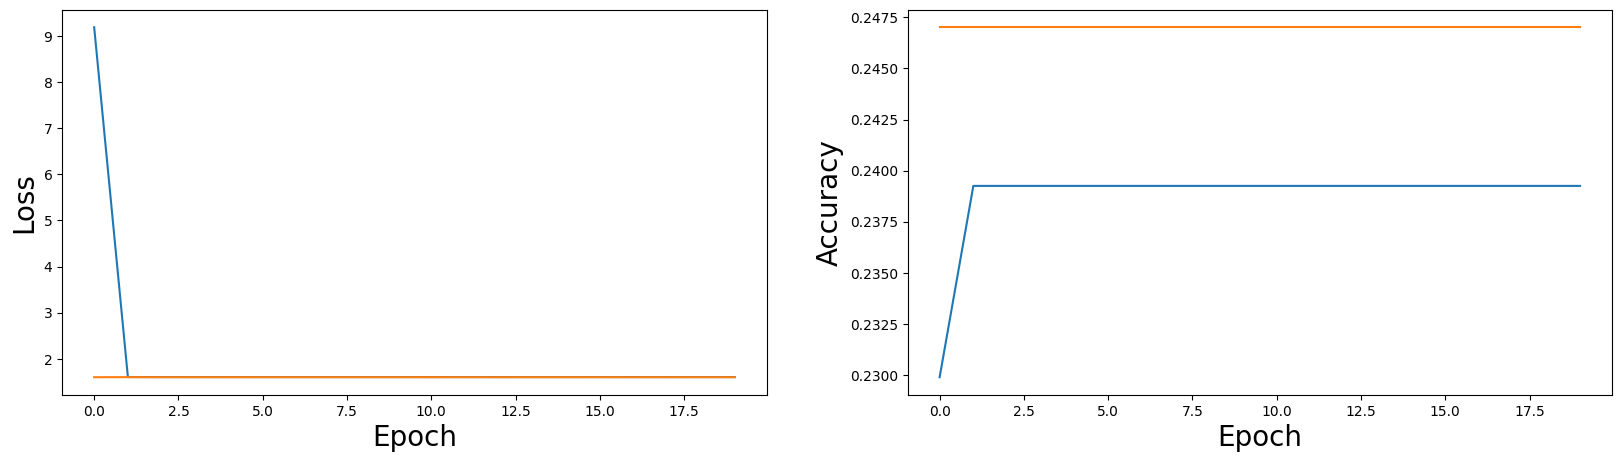

In [43]:
# Plot of the loss
fig, ax = plt.subplots(1, 2, figsize = (20, 5)) # Create 2 axes (0 and 1)
ax[0].plot(training_loss)
ax[0].plot(val_loss)
ax[0].set_xlabel('Epoch', fontsize = 20)
ax[0].set_ylabel('Loss', fontsize = 20)

# Plot of the accuracy
ax[1].plot(training_accuracy)
ax[1].plot(val_accuracy)
ax[1].set_xlabel('Epoch', fontsize = 20)
ax[1].set_ylabel('Accuracy', fontsize = 20)

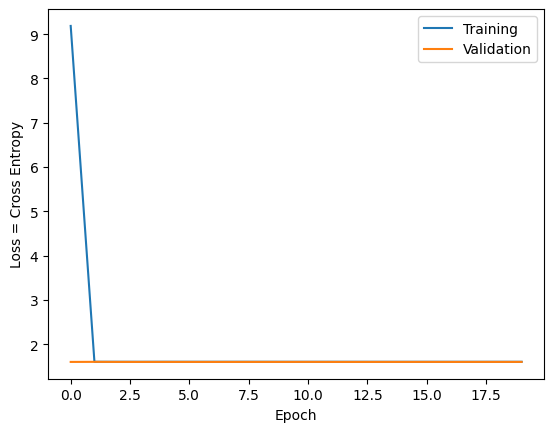

In [44]:
# Plot the training and validation losses
# versus epoch.
# plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()

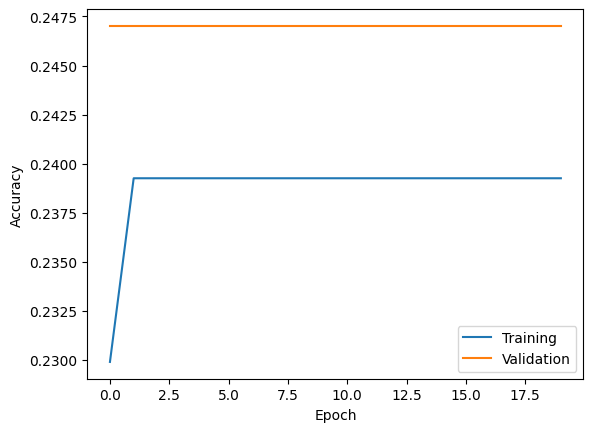

In [45]:
# Plot the training and validation accuracy versus epoch.
# plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()

##### Evaluation Stage

In [46]:
# Evaluation Stage

# Now use the trained model to predict output  classes in the test set
y_pred = model.predict(x_testNormalized)

# We can now use  the argmax() function to determine the index # of the label with the highest probability for   each row in y_pred.
y_pred_class = np.argmax(y_pred, axis=1)

23/23 [==============================] - 3s 111ms/step


In [47]:
model.evaluate(x = x_test, y = y_test_cat) # Evaluate Overall accuracy of the model

23/23 [==============================] - 3s 113ms/step - loss: 2.9222 - accuracy: 0.2589


[2.922187328338623, 0.25885558128356934]

In [48]:
# Evaluation of the test set
y_pred = model.predict(x_test)
print(y_pred[:5])
y_pred = y_pred.argmax(axis = 1) # Extract class with highest probability

23/23 [==============================] - 3s 115ms/step
[[8.18410039e-01 4.84870411e-02 4.81184950e-04 1.63872782e-02
  1.16234519e-01]
 [1.92964062e-01 2.24442080e-01 1.96450830e-01 1.69967353e-01
  2.16175705e-01]
 [2.52577394e-01 3.10672432e-01 9.43344161e-02 1.39652446e-01
  2.02763289e-01]
 [4.71188992e-01 3.98978263e-01 2.21122336e-03 4.52788770e-02
  8.23426247e-02]
 [2.74576873e-01 2.91502714e-01 1.03957176e-01 1.62779659e-01
  1.67183578e-01]]


##### Visualization Stage(Result Visualization)

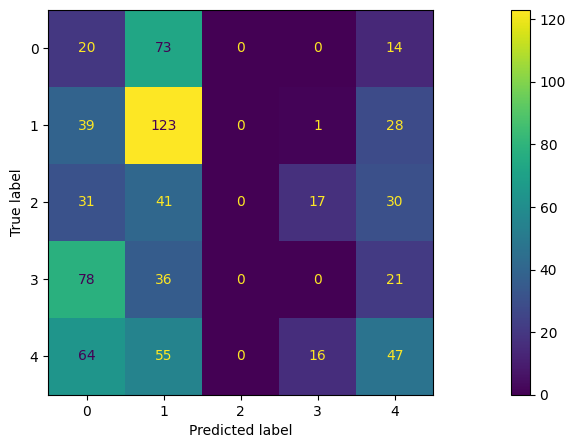

In [49]:
# Display the Results
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test = y_test_cat.argmax(axis = 1)

fig, ax = plt.subplots(figsize = (20, 5))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(ax = ax)
plt.show()

In [50]:
# Displaying the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.19      0.12       107
           1       0.38      0.64      0.47       191
           2       0.00      0.00      0.00       119
           3       0.00      0.00      0.00       135
           4       0.34      0.26      0.29       182

    accuracy                           0.26       734
   macro avg       0.16      0.22      0.18       734
weighted avg       0.19      0.26      0.21       734



### HYPERPARAMETER TUNING

### Building The Third Model
###### This model will include an:
    early stoping
    Learning rate of 0.0001 lower what we have used so far
    Batch size of 64
    

##### Constructor Stage

In [26]:
# We will be building the CNN model. Using the _Sequential()_ model from 
# the Keras library to build a CNN with our preffered architecture.
# The libraries has been imported at the begining


model = Sequential() # Instantiating the model

# First layer of 32 filters and Maxpooling layer with input_shape
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                input_shape = (width_npix, height_npix, 3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # MaxPooling The Layer

# Second layer of 64 filters and Maxpooling layer with input_shape
model.add(Conv2D(filters = 64, kernel_size = (3, 3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # MaxPooling Layer

# Third layer of 128 filters and Maxpooling layer with input_shape
model.add(Conv2D(filters = 128, kernel_size = (3, 3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # MaxPooling Layer

# Flatten The Layer
model.add(Flatten()) # Converting 2d to 1d

# Dense layer of 64 Units and dropout layer
model.add(Dense(64,
                activation = 'relu'))
model.add(Dropout(0.5)) # Dropout of 50% of neuron at each training

# Output Layer with 5 classes
model.add(Dense(5,
                activation = 'softmax'))

model.summary() # Print model summary



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

##### Compilation Stage

In [27]:
# We will be compiling the data here.
# We will be using Adam optimizer with learning rate of 0.0001 which is lower than the default 0.001 use in the first model above
# All modules imported already


adamOptimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer = adamOptimizer, 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', patience = 15) # This might cause code error but lets hold on still


##### Training Stage

In [28]:
# We will be training in this stage
# We are training this model for 20 epochs, using batches of randomly
# --transformed images generated from the training data, with a batch size of 64
# Specifies a batch size for the training and uses the train_datagen from augmentation during training
batchSize = 64
history = model.fit(train_datagen.flow(x_trainNormalized, y_train_cat,
                                       batch_size = batchSize,
                                       subset = "training"),
                    epochs = 55,
                    callbacks = [earlyStopping], # This might cause code error but lets hold on still
                    validation_data = train_datagen.flow(x_trainNormalized, y_train_cat,
                                                         batch_size = batchSize,
                                                         subset = "validation"))


Epoch 1/55
37/37 [==============================] - 150s 4s/step - loss: 1.5613 - accuracy: 0.2840 - val_loss: 1.4286 - val_accuracy: 0.4276
Epoch 2/55
37/37 [==============================] - 142s 4s/step - loss: 1.4299 - accuracy: 0.3806 - val_loss: 1.3152 - val_accuracy: 0.5128
Epoch 3/55
37/37 [==============================] - 152s 4s/step - loss: 1.3628 - accuracy: 0.4198 - val_loss: 1.2757 - val_accuracy: 0.4906
Epoch 4/55
37/37 [==============================] - 154s 4s/step - loss: 1.3317 - accuracy: 0.4470 - val_loss: 1.1829 - val_accuracy: 0.5656
Epoch 5/55
37/37 [==============================] - 149s 4s/step - loss: 1.2672 - accuracy: 0.4806 - val_loss: 1.1205 - val_accuracy: 0.5877
Epoch 6/55
37/37 [==============================] - 148s 4s/step - loss: 1.2603 - accuracy: 0.4951 - val_loss: 1.1207 - val_accuracy: 0.5673
Epoch 7/55
37/37 [==============================] - 142s 4s/step - loss: 1.2234 - accuracy: 0.5066 - val_loss: 1.0801 - val_accuracy: 0.6099
Epoch 8/55
37

In [29]:
# Dataframe for holding the history of our fitting
history_df = pd.DataFrame(history.history) # Saving to a DataFrame
history_df # Printing the DataFrame

,loss,accuracy,val_loss,val_accuracy
0,1.561298,0.283951,1.428626,0.427598
1,1.429931,0.380587,1.315212,0.512777
2,1.362826,0.419753,1.275724,0.490630
3,1.331733,0.446999,1.182897,0.565588
4,1.267187,0.480630,1.120487,0.587734
5,1.260274,0.495104,1.120669,0.567291
6,1.223387,0.506599,1.080126,0.609881
7,1.200642,0.509153,1.060144,0.616695
8,1.167710,0.521073,1.014682,0.613288
9,1.144262,0.555130,0.989203,0.643952


In [30]:
training_loss = history_df['loss'] # Extracting the training loss
val_loss =  history_df['val_loss'] # Extracting the validation loss
training_accuracy = history_df['accuracy']  # Extracting the training accuracy
val_accuracy = history_df['val_accuracy']  # Extracting the val accuracy

Text(0, 0.5, 'Accuracy')

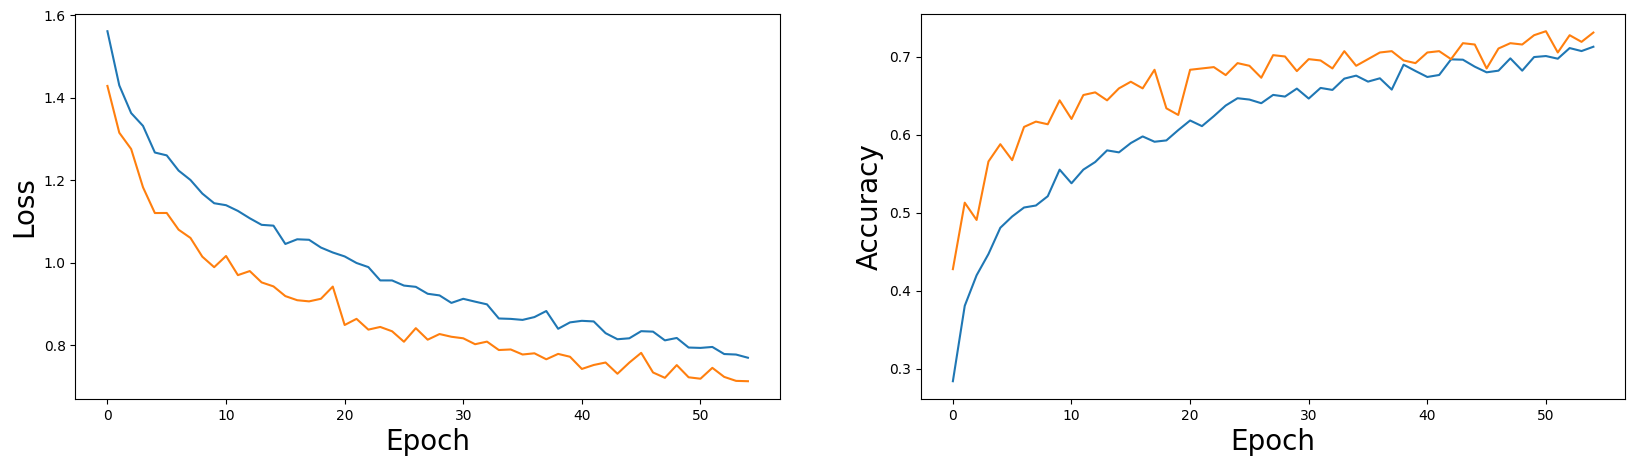

In [31]:
# Plot of the loss
fig, ax = plt.subplots(1, 2, figsize = (20, 5)) # Create 2 axes (0 and 1)
ax[0].plot(training_loss)
ax[0].plot(val_loss)
ax[0].set_xlabel('Epoch', fontsize = 20)
ax[0].set_ylabel('Loss', fontsize = 20)

# Plot of the accuracy
ax[1].plot(training_accuracy)
ax[1].plot(val_accuracy)
ax[1].set_xlabel('Epoch', fontsize = 20)
ax[1].set_ylabel('Accuracy', fontsize = 20)


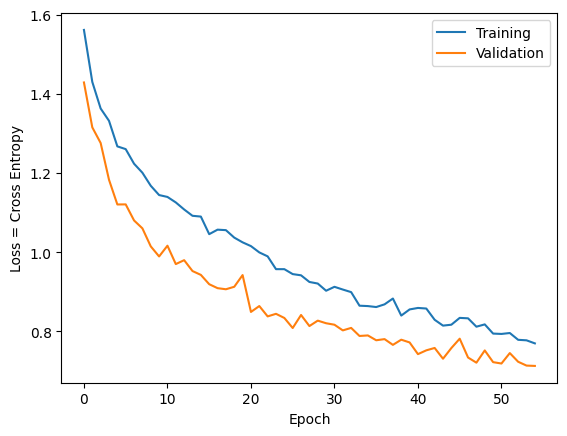

In [32]:
# Plot the training and validation losses
# versus epoch.
# plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Cross Entropy")
# Show the plot.
plt.show()


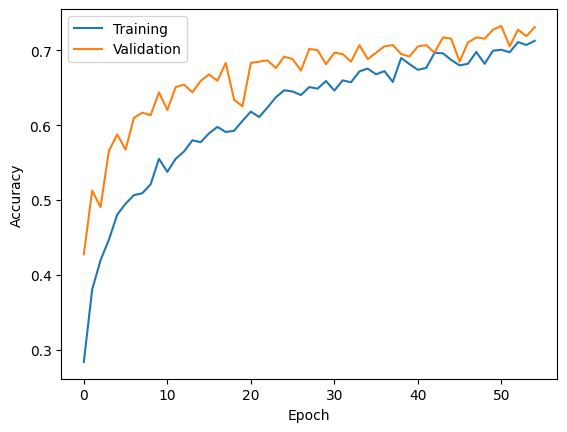

In [33]:
# Plot the training and validation accuracy versus epoch.
# plt.figure(figsize = (8, 6), dpi = 300)
plt.plot(history_df["accuracy"], label = "Training")
plt.plot(history_df["val_accuracy"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Show the plot.
plt.show()


##### Evaluation Stage

In [34]:
# Evaluation Stage

# Now use the trained model to predict output  classes in the test set
y_pred = model.predict(x_testNormalized)

# We can now use  the argmax() function to determine the index # of the label with the highest probability for   each row in y_pred.
y_pred_class = np.argmax(y_pred, axis=1)


23/23 [==============================] - 10s 384ms/step


In [35]:
model.evaluate(x = x_test, y = y_test_cat) # Evaluate Overall accuracy of the model

23/23 [==============================] - 8s 345ms/step - loss: 148.1797 - accuracy: 0.6090


[148.17970275878906, 0.608991801738739]

In [36]:
# Evaluation of the test set
y_pred = model.predict(x_test)
print(y_pred[:5])
y_pred = y_pred.argmax(axis = 1) # Extract class with highest probability

23/23 [==============================] - 8s 335ms/step
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


##### Visualization Stage(Result Visualization)

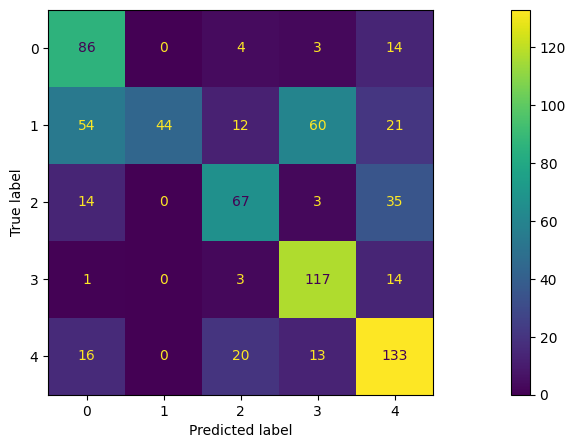

In [41]:
# Display the Results
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test = y_test_cat.argmax(axis = 1)

fig, ax = plt.subplots(figsize = (20, 5))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(ax = ax)
plt.show()

In [38]:
# Displaying the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.80      0.62       107
           1       1.00      0.23      0.37       191
           2       0.63      0.56      0.60       119
           3       0.60      0.87      0.71       135
           4       0.61      0.73      0.67       182

    accuracy                           0.61       734
   macro avg       0.67      0.64      0.59       734
weighted avg       0.70      0.61      0.58       734



##### REFERENCES

##### TensorFlow Load and preprocess images. Available online: https://www.tensorflow.org/tutorials/load_data/images [Accessed 29/12/2023].

##### TensorFlow tf.keras.preprocessing.image.ImageDataGenerator. Available online: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator [Accessed 29/12/2023].
 
